The objective of this notebook is to:
- Demonstrate training data and model components of linear regression model.
- Demonstrate how simple it is to implement ML components and algorithms.

Let's first import the required libraries.

In [2]:
from IPython.display import display, Math, Latex
# imported for proper rendering of LaTeX in notebook

import numpy as np

# import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. Training data contains features and label that is real number.
2. Model or inference: $y = Xw$

### 1. Training Data

In [4]:
# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:
w1=3
w0=4
n=100

X = 10*np.random.rand(n,)

# Obtain y = 4 + 3x + noise.    Noise is randomly sampled.
y = w0 + w1*X + np.random.randn(n,)

Let's examine the shapes of training data for sanity check.

In [5]:
print("Shape of the training data feature matrix: ", X.shape)
print("Shape of label vector: ", y.shape)

Shape of the training data feature matrix:  (100,)
Shape of label vector:  (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's do a quick sanity check to make sure the sizes of feature and labels sets are identical in both training and test sets.

In [7]:
print("Shape of training feature matrix: ", X_train.shape)
print("Shape of training label vector: ", y_train.shape)

print("Shpape of test feature matrix: ", X_test.shape)
print("Shape of test label vector: ", y_test.shape)

Shape of training feature matrix:  (80,)
Shape of training label vector:  (80,)
Shpape of test feature matrix:  (20,)
Shape of test label vector:  (20,)


Let's quickly check the first few examples and labels

In [8]:
X_train[:5]

array([0.96369004, 4.31920898, 0.91805624, 9.86003564, 9.1253131 ])

In [9]:
y_train[:5]

array([ 7.19815479, 17.86383455,  5.55718455, 33.69945943, 30.75544248])

Let's visualize the training set.

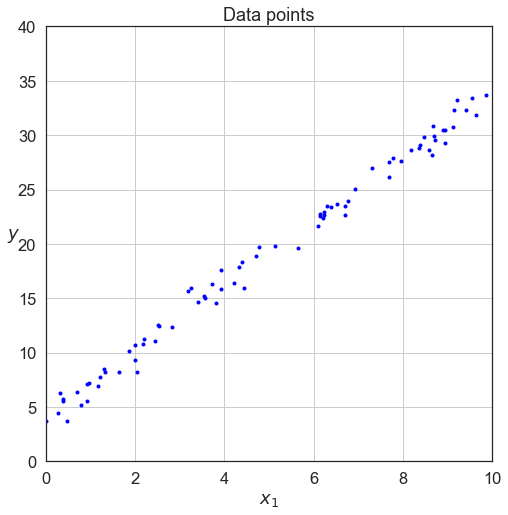

In [10]:
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is: $y = w_0 + w_1x_1$.  

We also add a special dummy feature $x_0$ and set it to 1. We create a helper function for that.

In [14]:
def add_dummy_feature(x):
    ''' Adds a dummy feature to the dataset.
    
    Args:
        x: Training dataset
        
    Returns:
        Training dataset with an addition of dummy feature.
    '''
    return np.column_stack((np.ones(x.shape[0]), x))

Let's preprocess the training set to add the dummy feature

In [15]:
print("Before adding dummy feature:\n", X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)
print("After adding dummy feature:\n", X_train_with_dummy[:5])

Before adding dummy feature:
 [0.96369004 4.31920898 0.91805624 9.86003564 9.1253131 ]


After adding dummy feature:
 [[1.         0.96369004]
 [1.         4.31920898]
 [1.         0.91805624]
 [1.         9.86003564]
 [1.         9.1253131 ]]


### 2. Model
The general vectorized form is as follows:
$$
y_{n \times 1} = X_{n \times (m+1)}w_{(m+1) \times 1}
$$

In [17]:
def predict(X, w):
    '''Prediction of output label for a given input.
    
    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1, 1).
        
    Returns:
        y: Predicted label vector of shape (n,).
    '''
    # Check to make sure that feature matrix and weight vector have compatible shapes.
    assert X.shape[1] == w.shape[0], "X and w don't have compatible dimensions."
    return X @ w

Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for the given dataset:

In [25]:
X_train = X_train_with_dummy

w=np.random.rand(2,)
w

array([0.90524776, 0.33406855])

In [26]:
y_hat = predict(X_train, w)

Let's compare the prediction with the actual value:

In [28]:
y_hat[:5]

array([1.2271863 , 2.34815966, 1.21194148, 4.19917561, 3.95372791])

In [29]:
y_train[:5]

array([ 7.19815479, 17.86383455,  5.55718455, 33.69945943, 30.75544248])

Since we used a random weight vector w, most of the predicted labels do not match the actual labels.

#### Comparision of vectorized and non-vectorized version of model inference

In [30]:
def non_vectorized_predict(X, w):
    '''Prediction of output label for a given input.
    
    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1, 1).
        
    Returns:
        y: Predicted label vector of shape (n,).
    '''
    y = []
    for i in range(0, X.shape[0]):
        y_hat_i = 0
        for j in range(0, X.shape[1]):
            y_hat_i += X[i][j] * w[j]
        y.append(y_hat_i)
    return np.array(y)

> For fairly large number of training examples the time of execution for vectorized form as compared to non vectorized form is less.  
> And we can actually see this particular phenomenon across different components of the ML models. **The vectorized implementations are far superior in terms of performance than their non-vectorized counterparts.** 

### 3. Loss function implementation
Loss function: $$ J(w) = \frac{1}{2}(Xw - y)^T(Xw - y) $$

In [31]:
def loss(X, y, w):
    '''Calculates loss for a model based on known labels.
    Args:
        X: Feature matrix for given inputs.
        y: Output label vector as predicted by the given model.
        w: Weight vector
        
    Returns:
        Loss
    '''
    e = predict(X, w) - y
    return (1/2) * (np.transpose(e) @ e)